In [114]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
#project link:https://app.dataquest.io/c/112/m/350/guided-project%3A-profitable-app-profiles-for-the-app-store-and-google-play-markets/14/next-steps

In [77]:
ios = pd.read_csv('/Users/leanhe/Desktop/PHD/Python/Projects/1_app/AppleStore.csv')
android = pd.read_csv('/Users/leanhe/Desktop/PHD/Python/Projects/1_app/googleplaystore.csv')

In [78]:
ios.columns

Index(['id', 'track_name', 'size_bytes', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'],
      dtype='object')

In [79]:
#fine the row of wrong data in android file
android.iloc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [80]:
#delete that row
android.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [81]:
android.drop(android.index[10472], inplace = True) #inplace = true will operate on the original dataset

In [82]:
android[10470:10473]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up


In [83]:
#reset index
android = android.reset_index(drop=True)
android[10470:10473]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up


In [84]:
#find duplicates

#find duplicates and include the first occurance
duplicates = android[android.duplicated(keep = False)] 

#sort so duplicated rows are shown together
duplicates = duplicates.sort_values(by = list(android.columns))

#reset index
duplicates = duplicates.reset_index(drop = True) 

#capture columns BEFORE dup_group exists
group_columns = list(duplicates.columns)

#fill NaN temporarily, otherwise, ngroup() won't see NaN as equal
duplicates_fill = duplicates.fillna("NA")

#group each duplication and give them a label
duplicates["dup_group"] = duplicates_fill.groupby(group_columns).ngroup()

duplicates[duplicates["dup_group"].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,dup_group


In [85]:
duplicates.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,dup_group
0,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,0
1,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,0
2,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,1
3,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,1
4,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,2


In [86]:
#remove duplicates and create a new dataframe
android = android.drop_duplicates()

#reset index, don't keep the old index as column. throw it away and make a new one
android = android.reset_index(drop=True)

In [87]:
ios = ios.drop_duplicates()
ios = ios.reset_index(drop=True)

In [88]:
#remove non-english apps
#we can assess the impact of this step, how precisely we need to do this. why removing them? etc..
#we would allow non-english characters up to 3 just incase we treat strings like "i love english 是的" as non-eng

def is_english(string):
    non_ascii = 0
    
    for character in string:
        if ord(character) > 127: #check if it is english
            non_ascii += 1
    
    if non_ascii > 3: 
        return False
    else:
        return True #allowing non-eng characters up to 3

print(is_english("i love english 是的"))
print(is_english("i love english 真的吗我不信"))


True
False


In [89]:
#apply is_english function
filtered_android = android[android["App"].apply(is_english)]

In [90]:
(~filtered_android["App"].apply(is_english)).any()

False

In [91]:
filtered_ios = ios[ios["track_name"].apply(is_english)]

In [92]:
#isolcating free app (only want free apps): price == 0
#check the type of price column: is it a string or integer or float?
filtered_android.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [137]:
#price column is an object, which is a mix type. convert it to integer. turn invalid values to NaN
filtered_android = filtered_android.copy()
filtered_android["Price"] = pd.to_numeric(filtered_android["Price"], errors = 'coerce')

In [138]:
filtered_ios = filtered_ios.copy()
filtered_ios["Price"] = pd.to_numeric(filtered_ios["price"], errors = 'coerce')

In [139]:
free_android = filtered_android[filtered_android["Price"] == 0]

In [140]:
free_ios = filtered_ios[filtered_ios["price"] == 0]

In [141]:
(free_android["Price"] >0).any()

False

In [142]:
(free_ios["price"] >0).any()

False

In [143]:
#Now we are done with cleaning the data
#find the most common genre on both ios and android: what are the characters of successful apps on both platforms

#first let's explore android data
free_android.head()
#we want to check what is the most common genre
#count number of app by genre
genres_count_android = free_android["Genres"].value_counts()
#calculate percentage of each genre
genres_pct_android = genres_count_android/ genres_count_android.sum()


In [144]:
#Let's turn genres_pct_android into a table
gp_android_table = genres_pct_android.reset_index() #turn Series to a DataFrame
gp_android_table.columns = ["Genres", "Percentage"]
gp_android_table

,Genres,Percentage
0,Tools,0.079887
1,Entertainment,0.059156
2,Education,0.051408
3,Business,0.043346
4,Productivity,0.039577
...,...,...
110,Card;Brain Games,0.000105
111,Tools;Education,0.000105
112,Arcade;Pretend Play,0.000105
113,Travel & Local;Action & Adventure,0.000105


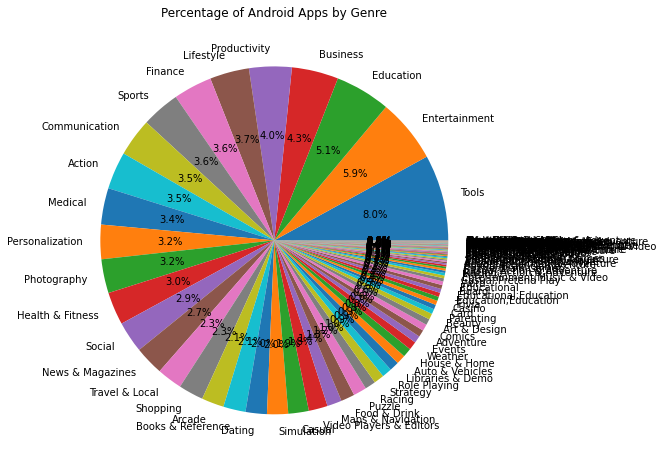

In [145]:
#Let's make a Pie Chart
plt.figure(figsize=(8,8))
plt.pie(gp_android_table["Percentage"], labels=gp_android_table["Genres"], autopct='%1.1f%%')
plt.title("Percentage of Android Apps by Genre")
plt.show()

In [146]:
#We can only show the top 5, then group the rest as "others"
top_20_android = genres_count_android[:20]
others = genres_count_android[20:].sum()
top_20_android["others"] = others
genre_pct_top_others = top_20_android / top_20_android.sum()
genre_pct_to_table = genre_pct_top_others.reset_index() #turn Series to a DataFrame
genre_pct_to_table.columns = ["Genres", "Percentage"]
genre_pct_to_table[:5]

,Genres,Percentage
0,Tools,0.079887
1,Entertainment,0.059156
2,Education,0.051408
3,Business,0.043346
4,Productivity,0.039577


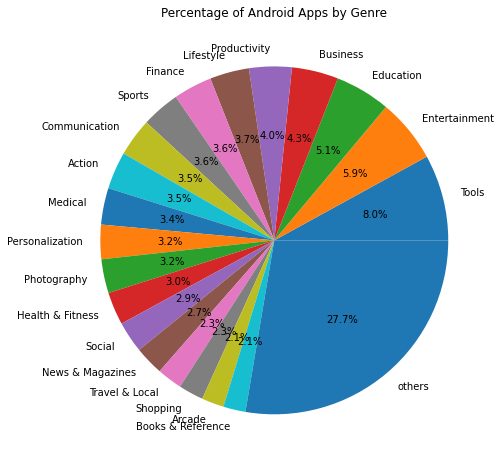

In [147]:
#Let's make a Pie Chart
plt.figure(figsize=(8,8))
plt.pie(genre_pct_to_table["Percentage"], labels=genre_pct_to_table["Genres"], autopct='%1.1f%%', normalize = False)
plt.title("Percentage of Android Apps by Genre")
plt.show()

In [148]:
#next let's explore ios data
#columns: prime_genre
#find the most common genre
genres_count_ios = free_ios["prime_genre"].value_counts()
genres_pct_ios = genres_count_ios / genres_count_ios.sum()

#turn into a frequency table
genres_ios_table = genres_pct_ios.reset_index()
genres_ios_table.columns = ["Genres", "Percentage"]
genres_ios_table[:5]

,Genres,Percentage
0,Games,0.581626
1,Entertainment,0.078833
2,Photo & Video,0.049659
3,Education,0.036623
4,Social Networking,0.032899


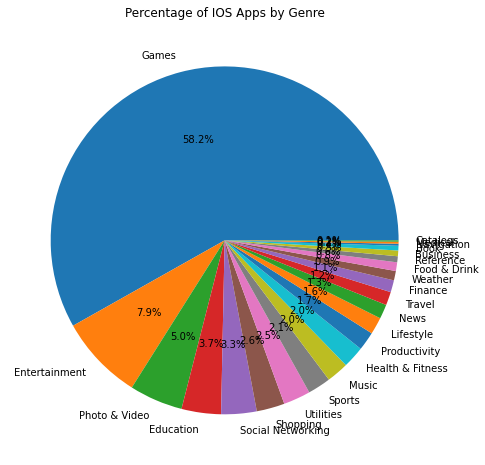

In [149]:
#Draw Pie Chart
plt.figure(figsize=(8,8))
plt.pie(genres_ios_table["Percentage"], labels=genres_ios_table["Genres"], autopct='%1.1f%%', normalize = False)
plt.title("Percentage of IOS Apps by Genre")
plt.show()

In [154]:
#which genre has the most users?
#we want to find out the average installation per genre
#not sum, because a genre can have 10000 apps, but each app only have 1 user, vs. 10 apps, each have 20 user

#first convert strings to numbers
#we see that column Installs is strings, like 10,000+. so we will treat 10,000+ as 10000
#remove , and + sign
free_android = free_android.copy()
#First, convert obj to str
free_android["Installs"] = free_android["Installs"].astype(str)
#replace , and + with ""
free_android["Installs"] = free_android["Installs"].str.replace(",", "")
free_android["Installs"] = free_android["Installs"].str.replace("+", "", regex = False) #treat+ as a str not a plus
free_android["Installs"] = free_android["Installs"].astype(int)
free_android.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [164]:
#calculate mean installation group by genres
avg_install_by_genre_a = free_android.groupby("Genres")["Installs"].mean().reset_index()
avg_install_by_genre_a.columns = ["Genres", "Avg Installs"]
avg_install_by_genre_a = avg_install_by_genre_a.sort_values(by = "Avg Installs", ascending = False)
avg_install_by_genre_a

,Genres,Avg Installs
3,Adventure;Action & Adventure,8.236364e+07
33,Communication,7.145239e+07
5,Arcade,4.906915e+07
24,Casual,4.759779e+07
97,Social,4.517640e+07
...,...,...
61,Health & Fitness;Education,1.000000e+05
32,Comics;Creativity,5.000000e+04
18,Books & Reference;Education,1.000000e+03
95,Simulation;Education,5.000000e+02


In [163]:
#ios:int already
#calculate mean group by genres
avg_install_by_genre_i = free_ios.groupby("prime_genre")["rating_count_tot"].mean().reset_index()
avg_install_by_genre_i.columns = ["Genres", "Avg Installs"]
avg_install_by_genre_i = avg_install_by_genre_i.sort_values(by = "Avg Installs", ascending = False)
avg_install_by_genre_i


,Genres,Avg Installs
12,Navigation,86090.333333
16,Reference,74942.111111
18,Social Networking,71548.349057
11,Music,57326.530303
22,Weather,52279.892857
0,Book,39758.500000
6,Food & Drink,33333.923077
5,Finance,31467.944444
14,Photo & Video,28441.543750
20,Travel,28243.800000
